In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats, signal
%matplotlib inline

In [2]:
syn_type = 'soma'
num_syns = 30
syn_weight = 1
in_freq = 40

sim_name = f'LFP-{syn_type}'
sim_label = f'{sim_name}_{num_syns}Ex{syn_weight}_1x{in_freq}Hz'
sim_label += '_' + 'syns'  # _no-Na, _no-Ca, _no-Na-Ca, spiking

sim_dir = f'/home/kedoxey/CRCNS/PyramidalCellSimulations/models/NEURON/NMLCL000073-NEURON/output/{sim_name}/{sim_label}'

In [3]:
with open(os.path.join(sim_dir, f'L5PC_{sim_label}_data.pkl'),'rb') as fp:
    all_data = pickle.load(fp)
simData = all_data['simData']

--No graphics will be displayed.


In [4]:
t = np.array(simData['t'])
lfp = simData['LFP']
num_elecs = len(lfp[0])
V_soma = np.array(simData['V_soma']['cell_0'])
t_spikes = t[np.where(V_soma>10)]
t_spike = t_spikes[np.where(t_spikes>600)[0][0]]
dt = t[1] - t[0]

lfp_elec = {i: np.zeros(len(lfp)) for i in range(num_elecs)}
lfp_elec_norm = {i: None for i in range(num_elecs)}
lfp_elec_peaks = {i: None for i in range(num_elecs)}
for t_i, lfp_t in enumerate(lfp):
    for elec_i, lfp_t_i in enumerate(lfp_t):
        lfp_elec[elec_i][t_i] = lfp_t_i

for i, lfp_i in lfp_elec.items():
    lb = -1
    ub = 1
    lfp_norm = (ub-lb)*((lfp_i - np.min(lfp_i))/(np.max(lfp_i) - np.min(lfp_i))) + lb
    # lfp_norm = ((2*((lfp_i - np.min(lfp_i)) / (np.max(lfp_i) - np.min(lfp_i))) - 1)/2)-np.average(lfp_i)  # normalize between -1 and 1
    # lfp_norm = ((lfp_i - np.min(lfp_i)) / (np.max(lfp_i) - np.min(lfp_i)))
    # lfp_norm = stats.zscore(lfp_i)
    lfp_elec_norm[i] = lfp_norm

    peaks, _ = signal.find_peaks(lfp_i,prominence=(max(lfp_i)-0.00005))
    lfp_elec_peaks[i] = peaks


0.00035177398325881974
0.0013336104114354897
0.0016739237697975422
0.004090687984391945
0.0002900903638673587
0.0002314397713657438


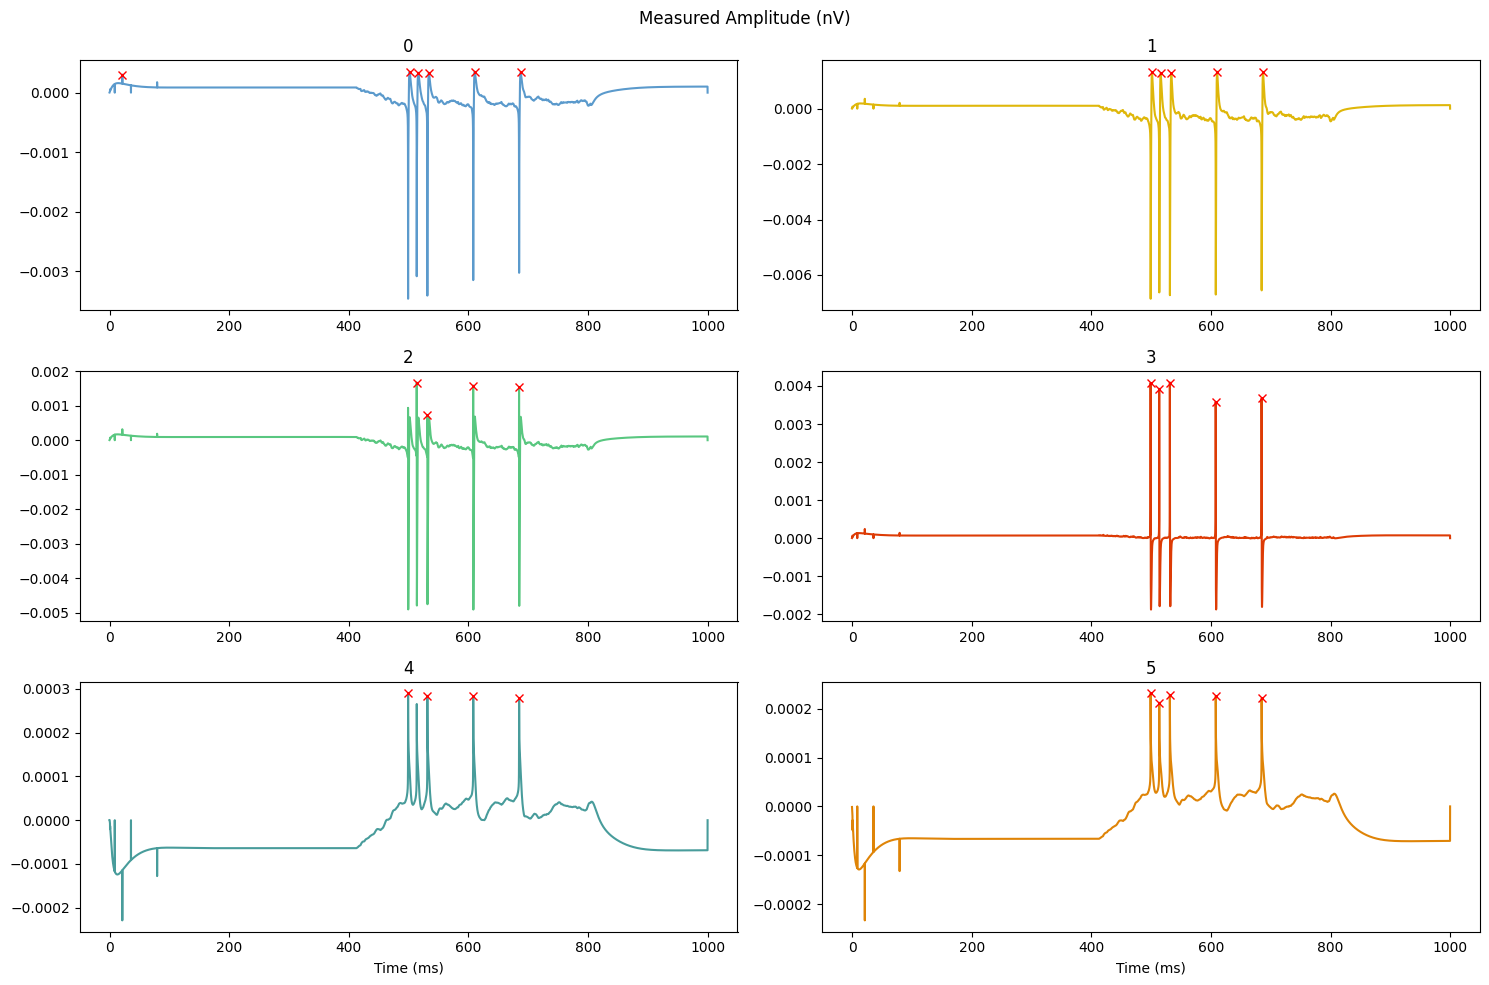

In [5]:
%matplotlib inline

fig, axs = plt.subplots(num_elecs//2, 2, figsize=(15,10))
axs = axs.ravel()

cmap = mpl.colormaps['tab10']
colors = cmap(np.linspace(0,1,len(lfp_elec)))
colors = {0: (91/255,154/255,204/255),
          1: (223/255,183/255,10/255),
          2: (89/255,199/255,128/255),
          3: (221/255,59/255,5/255),
          4: (72/255,156/255,155/255),
          5: (223/255,132/255,7/255)}

# cmap = mpl.cm.get_cmap('jet')
# colors = [cmap(x) for x in np.linspace(0, 1, num_elecs)]

for i, lfp_i in lfp_elec.items():
    print(max(lfp_i))
    peaks, _ = signal.find_peaks(lfp_i,prominence=(max(lfp_i)-0.00005))
    axs[i].plot(t[:len(lfp_i)], lfp_i, color=colors[i])
    axs[i].plot(t[peaks],lfp_i[peaks],'xr')
    axs[i].set_title(i)
    # axs[i].set_ylim([-0.009,0.009])
    # axs[i].set_yticks([-0.007,-0.0035,0,0.0035,0.007])
    # axs[i].set_xlim([606.75,613.25])
    # axs[i].set_xticks([607,609,611,613])

axs[-1].set_xlabel('Time (ms)')
axs[-2].set_xlabel('Time (ms)')

fig.suptitle('Measured Amplitude (nV)')
fig.tight_layout()

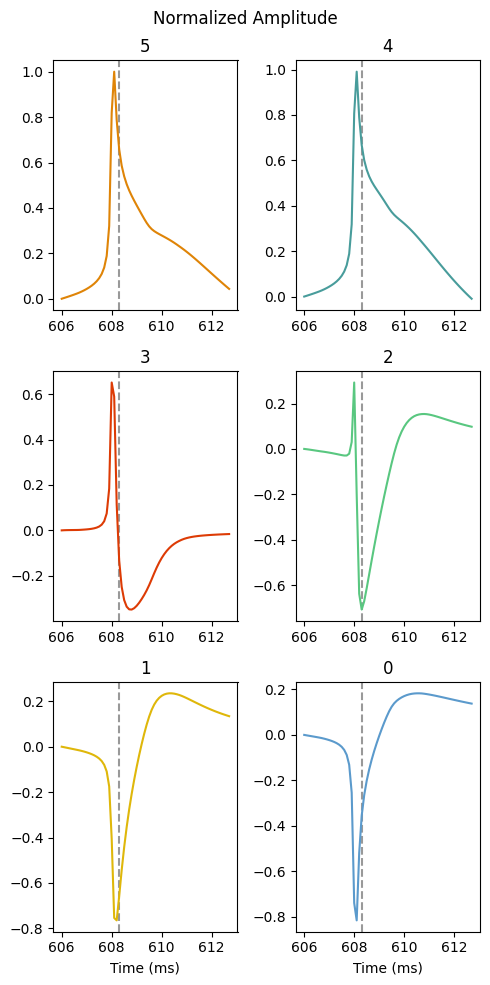

In [7]:
fig, axs = plt.subplots(num_elecs//2, 2, figsize=(5,10))
axs = axs.ravel()

slice_start = int((t_spike - 2.25)/dt)
slice_end = int((t_spike + 4.5)/dt)
t_slice = t[slice_start:slice_end]

for ax_i, i in enumerate(reversed(range(num_elecs))):

    lfp_i = lfp_elec[i]
    lfp_slice = lfp_i[slice_start:slice_end]

    height = max(lfp_slice) - min(lfp_slice)
    lfp_slice_norm = lfp_slice/height
    lfp_slice_norm -= lfp_slice_norm[0]

    axs[ax_i].plot(t_slice,lfp_slice_norm,color=colors[i],zorder=12)
    axs[ax_i].axvline(t_spike,alpha=0.4,color='k',zorder=1,linestyle='--')
    xticks = [(int(t_spike.round(0))-2)+2*i for i in range(4)]
    axs[ax_i].set_xticks(xticks)
    axs[ax_i].set_title(i)

axs[-1].set_xlabel('Time (ms)')
axs[-2].set_xlabel('Time (ms)')

fig.suptitle('Normalized Amplitude')
fig.tight_layout()

In [10]:
num_traces = 2
t = np.array(simData['t'])
V_soma = np.array(simData['V_soma']['cell_0'])
V_apic_32 = np.array(simData['V_apic_32']['cell_0'])

sec_add = None
if 'basal' in syn_type:
    sec_add = 'dend_22'
elif 'apical' in syn_type:
    sec_add = 'apic_50'

if sec_add:
    V_syn_in = np.array(simData[f'V_{sec_add}']['cell_0'])
    num_traces += 1
t_spikes = t[np.where(V_soma>-10)]

In [254]:
%matplotlib inline

In [255]:
temp = 5

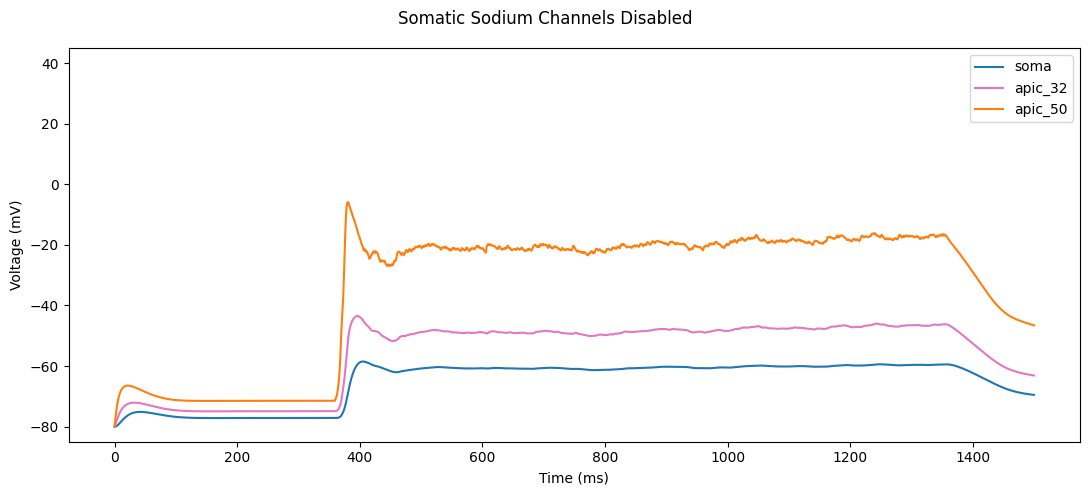

In [256]:
fig, axs = plt.subplots(1, 1, figsize=(11,5))
# axs.ravel()

axs.plot(t,V_soma, label='soma', color='tab:blue')
axs.plot(t,V_apic_32, label='apic_32', color='tab:pink')
if sec_add:
    axs.plot(t,V_syn_in, label=sec_add, color='tab:orange')

axs.legend(loc='upper right')
axs.set_ylabel('Voltage (mV)')
axs.set_ylim([-85,45])
axs.set_yticks([-80, -60, -40, -20, 0, 20, 40])
axs.set_xlabel('Time (ms)')

if 'no-Na-Ca' in sim_label:
    fig.suptitle('Somatic Calcium and Sodium Channels Disabled')
elif 'no-Ca' in sim_label:
    fig.suptitle('Somatic Calcium Channels Disabled')
elif 'no-Na' in sim_label:
    fig.suptitle('Somatic Sodium Channels Disabled')
else:
    fig.suptitle('No Channels Disabled')


fig.tight_layout()
# fig.savefig(os.path.join(sim_dir,'voltage_traces.png'),dpi=300)

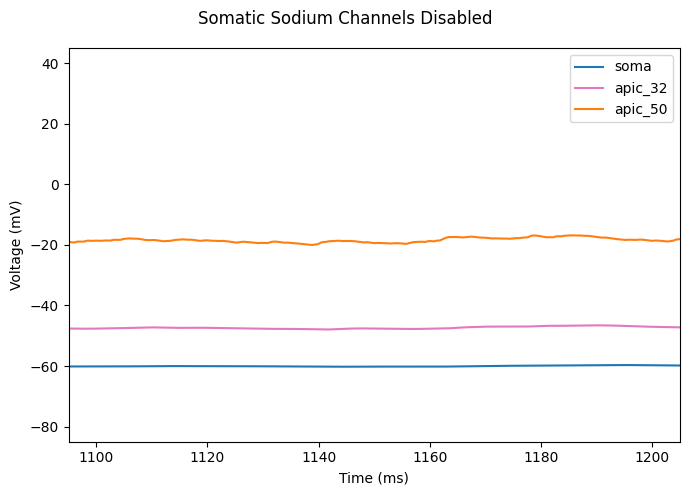

In [257]:
fig, axs = plt.subplots(1, 1, figsize=(7,5))
# axs.ravel()

axs.plot(t,V_soma, label='soma', color='tab:blue')
axs.plot(t,V_apic_32, label='apic_32', color='tab:pink')
if sec_add:
    axs.plot(t,V_syn_in, label=sec_add, color='tab:orange')

axs.legend(loc='upper right')
axs.set_ylabel('Voltage (mV)')
axs.set_ylim([-85,45])
axs.set_yticks([-80, -60, -40, -20, 0, 20, 40])
if 'soma' in syn_type:
    xlims = [1175, 1285]
elif 'apical' in syn_type:
    xlims = [1095, 1205]
elif 'basal' in syn_type:
    xlims = [1195, 1305]

axs.set_xlim(xlims)
# axs.set_xticks([910, 912, 914, 916, 918, 920])
axs.set_xlabel('Time (ms)')

if 'no-Na-Ca' in sim_label:
    fig.suptitle('Somatic Calcium and Sodium Channels Disabled')
elif 'no-Ca' in sim_label:
    fig.suptitle('Somatic Calcium Channels Disabled')
elif 'no-Na' in sim_label:
    fig.suptitle('Somatic Sodium Channels Disabled')
else:
    fig.suptitle('No Channels Disabled')


fig.tight_layout()
fig.savefig(os.path.join(sim_dir,'spike.png'),dpi=300)